In [1]:
import pandas as pd, re
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

In [2]:
df = pd.read_csv('SeattleFleetEquipmentSales.csv', parse_dates=['SALE_DATE'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
EQUIP_ID          1055 non-null object
YEAR              1055 non-null int64
MAKE              1055 non-null object
MODEL             1055 non-null object
DESCRIPTION       1055 non-null object
DEPT              1055 non-null object
SALE_PRICE        1055 non-null float64
SALE_DATE         1055 non-null datetime64[ns]
SOLD_BY           1055 non-null object
VIN               1055 non-null object
Equipment Type    1055 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 90.7+ KB


In [4]:
df = pd.get_dummies(df, columns=['DEPT','SOLD_BY','MAKE','MODEL','Equipment Type','DESCRIPTION'])

In [5]:
df[:5].transpose().head(10)

,0,1,2,3,4
EQUIP_ID,3872,98242,98243,93809,98244
YEAR,2000,2009,2009,2009,2009
SALE_PRICE,9600,3050,3800,8600,1500
SALE_DATE,2016-04-19 00:00:01,2017-08-21 00:00:01,2017-06-29 00:00:01,2017-02-01 00:00:01,2017-06-29 00:00:01
VIN,5B4KP32Y3Y3322902,2W9MPH6199S044105,2W9MPHS044106,MOXUVGX032927,2W9MPH6129S044107
DEPT_CEN,0,0,0,0,0
DEPT_DON,0,0,0,0,0
DEPT_DPR,1,0,0,1,0
DEPT_FAS,0,0,0,0,0
DEPT_HSD,0,0,0,0,0


In [7]:
df.describe()

,YEAR,SALE_PRICE,DEPT_CEN,DEPT_DON,DEPT_DPR,DEPT_FAS,DEPT_HSD,DEPT_ITD,DEPT_SDCI,DEPT_SDOT,...,DESCRIPTION_VAN CARGO,DESCRIPTION_VAN CARGO CAMERA WITH GENERATOR 313841,DESCRIPTION_VAN CARGO E250,DESCRIPTION_VAN CARGO SPRINTER 3500 9990GVW,DESCRIPTION_VAN PASSENGER,DESCRIPTION_VAN PASSENGER FULL SIZE,DESCRIPTION_VAN WALK IN,DESCRIPTION_WALKIN VAN - CLASS 4,DESCRIPTION_WHEEL LOADER - 29000 LB,DESCRIPTION_YARD SWEEPER - SELF PROPELLED
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,2006.364929,9061.214493,0.019905,0.000948,0.203791,0.036967,0.003791,0.002844,0.019905,0.145024,...,0.003791,0.000948,0.000948,0.000948,0.000948,0.000948,0.000948,0.004739,0.003791,0.000948
std,4.511476,12253.906963,0.139741,0.030787,0.403007,0.188770,0.061487,0.053275,0.139741,0.352292,...,0.061487,0.030787,0.030787,0.030787,0.030787,0.030787,0.030787,0.068712,0.061487,0.030787
min,1940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,3014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,5500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,9700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,145000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


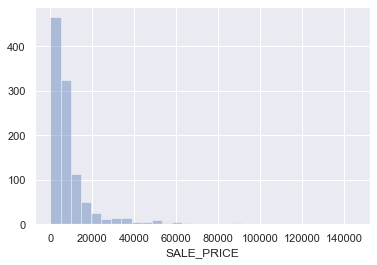

In [8]:
sns.distplot(df['SALE_PRICE'], kde=False, bins=30)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [10]:
feature_col = df.select_dtypes(include=['integer'])

In [11]:
features = feature_col.columns.values

In [12]:
target = 'SALE_PRICE'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
rf = RandomForestRegressor(n_estimators=250, oob_score=True)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [17]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)

test_score = r2_score(y_test, predicted_test)
train_score = r2_score(y_train, predicted_train)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Train data R-2 score: {train_score:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.645
Train data R-2 score: 0.936
Test data R-2 score: 0.877
Test data Spearman correlation: 0.877
Test data Pearson correlation: 0.937


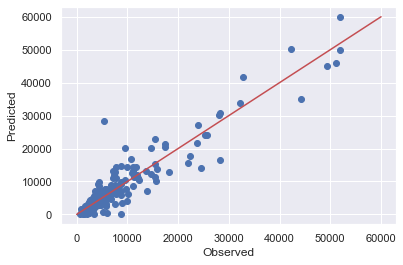

In [18]:
y_pred = rf.predict(X_test)

# Build a plot
plt.scatter(y_pred, y_test)
plt.xlabel('Observed')
plt.ylabel('Predicted')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()